In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('first_1000000_primes.csv')
primes = df['Prime Number']

# Calculating the differences between consecutive primes
gaps = primes.diff().dropna()
gaps = gaps.astype(int)  # Trying to convert to integer gaps



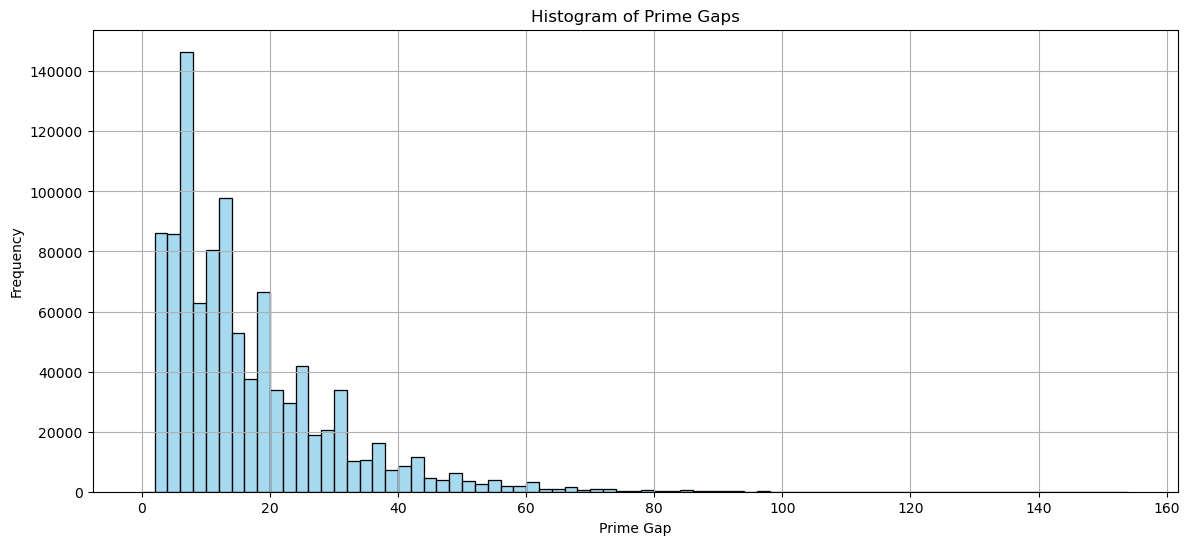

In [5]:
plt.figure(figsize=(14, 6))
sns.histplot(gaps, bins=range(0, gaps.max() + 2, 2), color='skyblue', edgecolor='black')
plt.title('Histogram of Prime Gaps')
plt.xlabel('Prime Gap')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


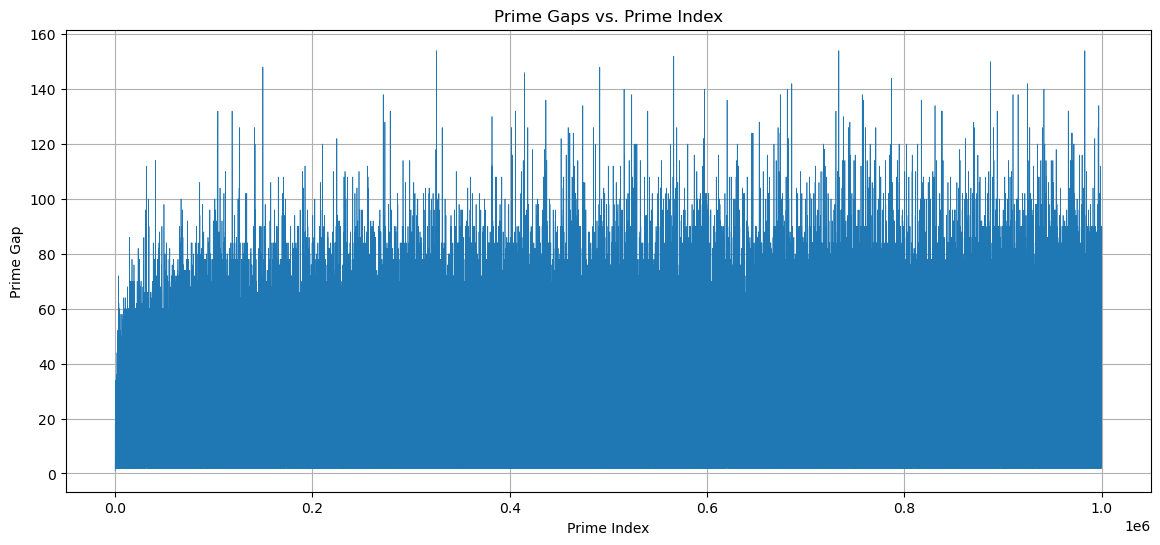

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(range(1, len(gaps)+1), gaps, lw=0.5)
plt.title('Prime Gaps vs. Prime Index')
plt.xlabel('Prime Index')
plt.ylabel('Prime Gap')
plt.grid(True)
plt.show()


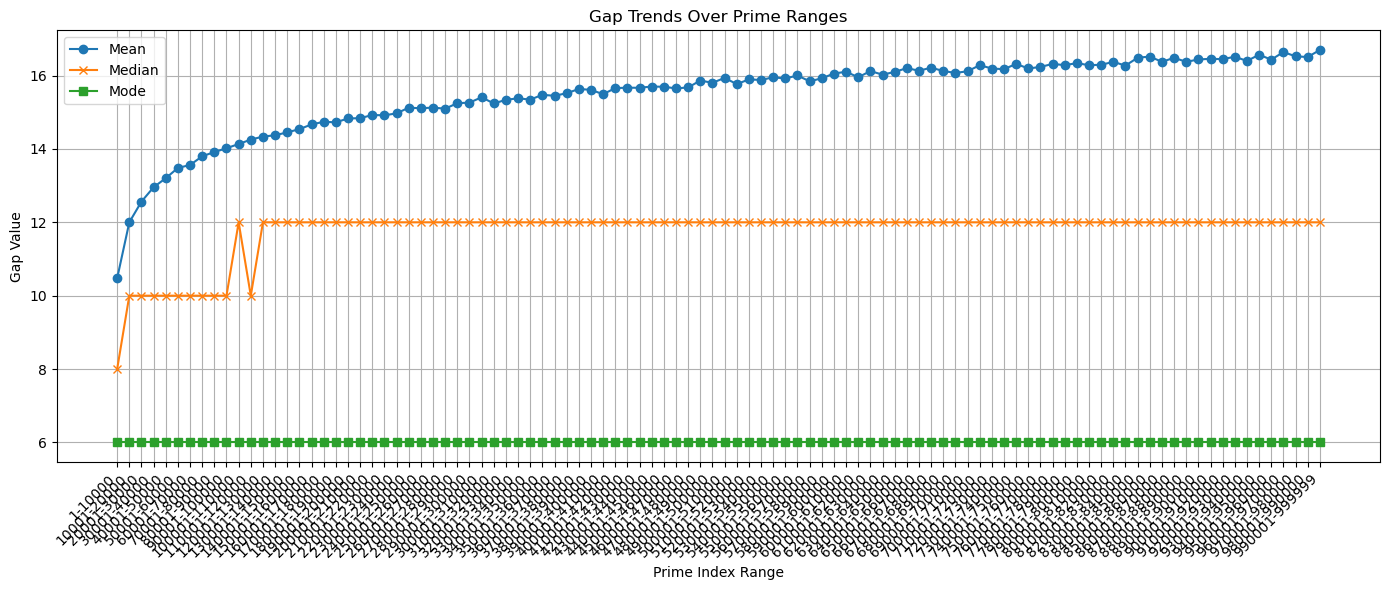

In [13]:
# Analyzing trends across ranges

def analyze_chunks(gaps, chunk_size):
    stats = {'Range': [], 'Mean': [], 'Median': [], 'Mode': []}
    for i in range(0, len(gaps), chunk_size):
        chunk = gaps[i:i+chunk_size]
        if len(chunk) == 0:
            continue
        stats['Range'].append(f"{i+1}-{i+len(chunk)}")
        stats['Mean'].append(chunk.mean())
        stats['Median'].append(chunk.median())
        stats['Mode'].append(chunk.mode().iloc[0] if not chunk.mode().empty else np.nan)
    return pd.DataFrame(stats)

# Analyzing over chunks of 10,000
chunk_stats = analyze_chunks(gaps, 10000)

# Plot trends
plt.figure(figsize=(14, 6))
plt.plot(chunk_stats['Range'], chunk_stats['Mean'], label='Mean', marker='o')
plt.plot(chunk_stats['Range'], chunk_stats['Median'], label='Median', marker='x')
plt.plot(chunk_stats['Range'], chunk_stats['Mode'], label='Mode', marker='s')
plt.title('Gap Trends Over Prime Ranges')
plt.xlabel('Prime Index Range')
plt.ylabel('Gap Value')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
chunk_stats.to_excel("prime_gap_stats_by_range.xlsx", index=False)
